# TASK 3 - CAR PRICE PREDICTION USING MACHINE LEARNING

In [93]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

import warnings 
%matplotlib inline
sns.set()
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [94]:
#loading data 
address="F:\python course\oasis\OIBSIP\OIBSIP\TASK 3 - CAR PRICE PREDICTION WITH MACHINE LEARNING\car data.csv"
df=pd.read_csv(address)
#inspecting first five rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [95]:
#show info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [96]:
#checking number of rows and col
df.shape

(301, 9)

In [97]:
#checking missing data
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [98]:
#check distribution of categories
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [99]:
#show first 5 rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [100]:
#encoding categorical data
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [101]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [102]:
#splitting data and target
df1=df.drop(["Car_Name","Selling_Price"],axis=1)
df2=df["Selling_Price"]
df1

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
5,2018,9.83,2071,1,0,0,0
6,2015,8.12,18796,0,0,0,0
7,2015,8.61,33429,1,0,0,0
8,2016,8.89,20273,1,0,0,0
9,2015,8.92,42367,1,0,0,0


In [103]:
df2

0      3.35
1      4.75
2      7.25
3      2.85
4      4.60
5      9.25
6      6.75
7      6.50
8      8.75
9      7.45
10     2.85
11     6.85
12     7.50
13     6.10
14     2.25
15     7.75
16     7.25
17     7.75
18     3.25
19     2.65
20     2.85
21     4.90
22     4.40
23     2.50
24     2.90
25     3.00
26     4.15
27     6.00
28     1.95
29     7.45
30     3.10
31     2.35
32     4.95
33     6.00
34     5.50
35     2.95
36     4.65
37     0.35
38     3.00
39     2.25
40     5.85
41     2.55
42     1.95
43     5.50
44     1.25
45     7.50
46     2.65
47     1.05
48     5.80
49     7.75
50    14.90
51    23.00
52    18.00
53    16.00
54     2.75
55     3.60
56     4.50
57     4.75
58     4.10
59    19.99
60     6.95
61     4.50
62    18.75
63    23.50
64    33.00
65     4.75
66    19.75
67     9.25
68     4.35
69    14.25
70     3.95
71     4.50
72     7.45
73     2.65
74     4.90
75     3.95
76     5.50
77     1.50
78     5.25
79    14.50
80    14.73
81     4.75
82    23.00
83  

In [104]:
#splitting training and test data
X_train, X_test, Y_train, Y_test = train_test_split(df1, df2, test_size = 0.1, random_state=2)

In [105]:
# Model training : linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [106]:
#Evaluation
train_prediction = lin_reg.predict(X_train)

In [107]:
# R sq error
score = metrics.r2_score(Y_train, train_prediction)
print("R squared Error : ", score)

R squared Error :  0.8796483009370217


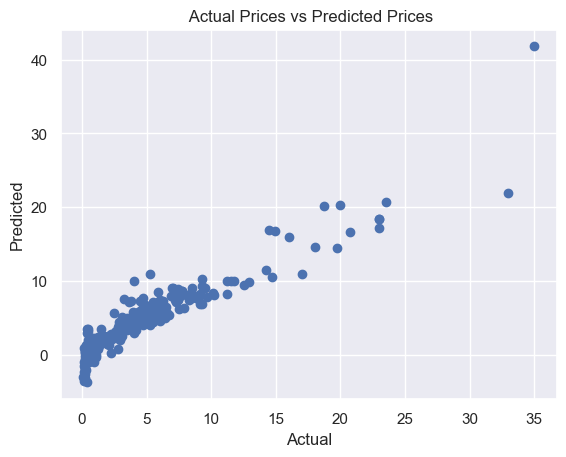

In [108]:
#visualization of actual price and predicted data
plt.scatter(Y_train, train_prediction)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


In [109]:
# prediction on Training data
test_prediction = lin_reg.predict(X_test)

In [110]:
# R squared Error
score = metrics.r2_score(Y_test, test_prediction)
print("R squared Error : ", score)

R squared Error :  0.8365861023209671


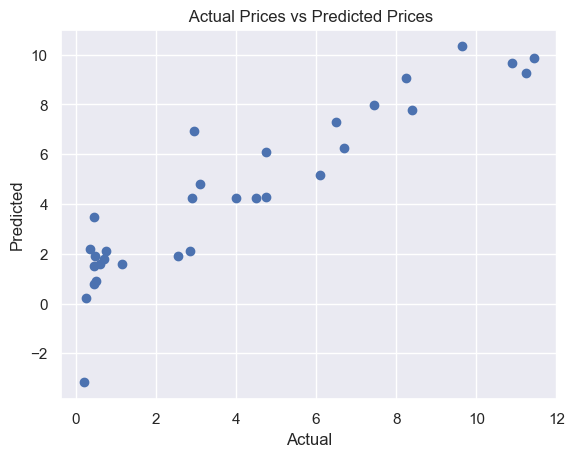

In [111]:
#visualization of actual price and predicted data on test set
plt.scatter(Y_test, test_prediction)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [112]:
# Model training : lasso regression
lass_reg_model = Lasso()

In [113]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [114]:
#evaluation
training_data_prediction = lass_reg_model.predict(X_train)

In [115]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8424480718240743


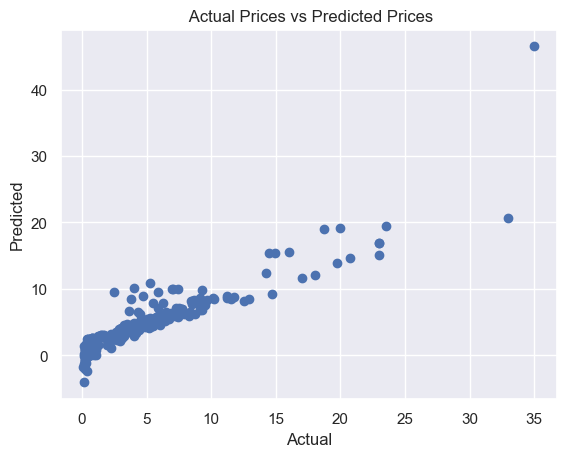

In [116]:
#visualization actual and predicted price
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


In [117]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [118]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709763132343395


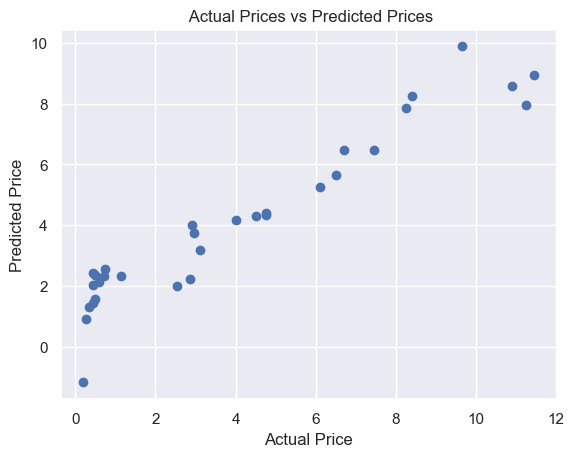

In [119]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()